In [1]:
%load_ext nb_black
%matplotlib inline
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
import numpy as np

set_matplotlib_formats("svg")


def plot_summary(ax, fits, truth=None):
    q25, q50, q75 = np.quantile(fits, [0.25, 0.5, 0.75], axis=0)
    x = np.arange(len(q50))
    ax.plot(x, q50, color="tab:blue")
    ax.fill_between(x, q25, q75, alpha=0.2, color="tab:blue")
    if truth is not None:
        ax.plot(x, truth, "--", alpha=0.5, color="tab:grey")

<IPython.core.display.Javascript object>

In [2]:
from infer import sim_and_fit

<IPython.core.display.Javascript object>

## Various models

In [3]:
mdls = [
    {"s": [0.02] * 50 + [-0.02] * 50, "h": [0.5] * 100, "f0": 0.1},
    {"s": [0.02] * 100 + [0.0] * 50 + [-0.02] * 50, "h": [0.5] * 200, "f0": 0.1},
    {"s": (([0.02] * 40 + [-0.02] * 40) * 3)[:200], "h": [0.5] * 200, "f0": 0.5},
]

<IPython.core.display.Javascript object>

In [27]:
%%time
fits = [[sim_and_fit(m, seed=i, lam_=1e2, s_mode=True, ell1=True)['x'] for i in range(25)] for m in mdls]

CPU times: user 9min 44s, sys: 4min 32s, total: 14min 17s
Wall time: 5min 10s


<IPython.core.display.Javascript object>

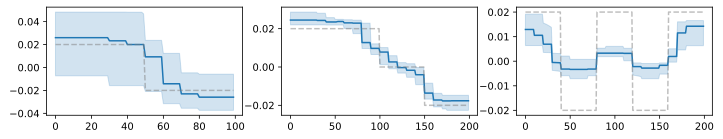

<IPython.core.display.Javascript object>

In [28]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 2))
for y, ax, m in zip(fits, axs, mdls):
    plot_summary(ax, y, m["s"])

## $\ell_1$ vs $\ell_2$ regularization

In [4]:
%%time
fits_l1 = [sim_and_fit(mdls[0], seed=i, lam_=2e1, s_mode=True, ell1=True)['x']
        for i in range(25)]
fits_l2 = [sim_and_fit(mdls[0], seed=i, lam_=1e3, s_mode=True, ell1=False)['x']
        for i in range(25)]  # ell2 requires larger lambda

CPU times: user 12min 4s, sys: 12min 11s, total: 24min 16s
Wall time: 3min 53s


<IPython.core.display.Javascript object>

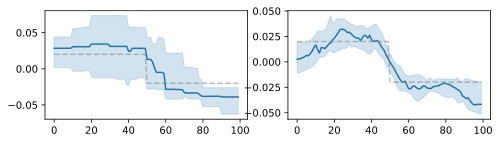

<IPython.core.display.Javascript object>

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 2))
plot_summary(axs[0], fits_l1, mdl["s"])
plot_summary(axs[1], fits_l2, mdl["s"])

## Inferring $h$
Low power to infer $h$.

In [6]:
mdl = {"s": [0.01] * 100, "h": [0.0] * 50 + [5.0] * 50, "f0": 0.1}

<IPython.core.display.Javascript object>

In [10]:
%%time
res = [sim_and_fit(mdl, seed=i, lam_=1., s_mode=False, fixed_val=0.01, ell1=True) for i in range(10)]
xs = [r['x'] for r in res]

CPU times: user 1min 58s, sys: 54 s, total: 2min 52s
Wall time: 55.9 s


<IPython.core.display.Javascript object>

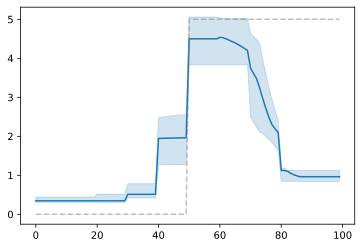

<IPython.core.display.Javascript object>

In [11]:
plot_summary(plt.gca(), xs, mdl["h"])

## Large $N_e$

In [4]:
sim_and_fit(mdls[0], seed=1, lam_=1.0, s_mode=True, fixed_val=1 / 2, ell1=False, Ne=1e2)

{'x': DeviceArray([ 1.00000024e-01,  1.00000024e-01,  1.00000024e-01,
               1.00000024e-01,  1.00000024e-01,  1.00000024e-01,
               1.00000024e-01,  1.00000024e-01,  1.00000024e-01,
               1.00000024e-01,  1.00000024e-01,  7.57197142e-02,
               3.95938158e-02, -7.48668506e-04, -3.15055251e-02,
              -8.44166875e-02, -1.00000024e-01, -1.00000024e-01,
              -1.00000024e-01, -1.00000024e-01, -6.75289631e-02,
              -6.12521768e-02, -7.84965754e-02, -9.22185183e-02,
              -1.00000024e-01, -1.00000024e-01, -1.00000024e-01,
              -1.00000024e-01, -1.00000024e-01, -7.74214268e-02,
               7.03512430e-02,  1.00000024e-01,  1.00000024e-01,
               1.00000024e-01,  1.00000024e-01,  9.80042219e-02,
               7.48660564e-02,  4.79792356e-02,  4.48071770e-03,
              -6.03241920e-02, -1.00000024e-01, -1.00000024e-01,
              -1.00000024e-01, -1.00000024e-01, -1.00000024e-01,
              -1.000

<IPython.core.display.Javascript object>